<h4>SIFT (Scale-Invariant Feature Transform)</h4>

Scale-Invariant Feature Transform (SIFT) là giải thuật dùng để nhận dạng và miêu tả những điểm đặc trưng (local features) trong ảnh. Điểm đặc biệt của SIFT nằm ngay trong cái tên của nó Scale-Invariant, tức là nó sẽ đưa ra các kết quả ổn định với những scale của ảnh khác nhau, bên cạnh đó cũng có thể nói giải thuật này có tính rotation-invariant. Không giống như Harris Detector, vốn phụ thuộc vào các thuộc tính của hình ảnh như góc nhìn, độ sâu và tỷ lệ, SIFT có thể thực hiện phát hiện đặc trưng độc lập với các thuộc tính này của hình ảnh. Điều này đạt được bằng cách chuyển đổi dữ liệu hình ảnh thành tọa độ bất biến tỷ lệ. 

Trong bài báo khoa học "Distinctive Image Features from Scale-Invariant Keypoints", SIFT được đặc tả rõ nét dưới bốn giai đoạn(stages) chính sau<ul>
    <li><b>Scale-space extrema detection: </b> Bước này, thuật toán thực hiện tính toán DoG (Differnet of Gaussian) của ảnh bằng cách lấy diff của GaussianBlur với hai giá trị $\sigma $ khác nhau. Sau khi tính được DoG của toàn ảnh, xét trên từng pixel so sánh với 8 neighbors và 9 pixels tương ứng của scale ảnh ngay trên và 9 pixels tương ứng ở scale dưới, nếu pixel đó là local extrema (lớn nhất) thì nó sẽ được coi như là 1 keypoint ở scale đó. (potiental keypoint) --> Kết quả của bước này là danh sách các potiental keypoint (keypoint tiềm năng)</li>
    <li><b>Keypoint localization:</b> Bước này thực hiện loại được keypoints có tương phản thấp (sử dụng chuỗi Taylor mở rộng để lấy vị trí của extrema chính xác hơn, rồi sau đó xét xem nếu intensity của extrema đó nhỏ hơn giá trị ngưỡng (0.03) thì sẽ loại keypoint đó), edge keypoint (dùng ma trận Hessian 2x2 để tính ra những đường cong chính tương tự như Harris Corner) và giữ lại những keypoint hợp lý hơn --> Kết quả là loại bỏ và giữ lại các keypoint hợp lý</li>
    <li><b>Orientation assignment: </b>Để đạt được khả năng phát hiện bất biến đối với góc quay của hình ảnh, cần phải tính toán hướng cho keypoints. Điều này được thực hiện bằng cách xem xét vùng lân cận của keypoint và tính toán độ lớn và hướng của độ dốc của vùng lân cận. Dựa trên các giá trị thu được, một biểu đồ được xây dựng với 36 ngăn để thể hiện hướng 360 độ (10 độ mỗi bin). Các đỉnh biểu đồ trên 80% được chuyển đổi thành keypoint mới được sử dụng để quyết định hướng của keypoint ban đầu<br>
        <img style="height: 200px; margin-left: 200px" src="https://media.geeksforgeeks.org/wp-content/uploads/20200606191134/8A1FB766-72C5-4CC8-8C25-0AF81A9E2998-1024x452.png"/>
    </li>
    <li><b>Keypoint descriptor:</b> Cuối cùng, đối với mỗi keypoint, một descriptor được tạo bằng cách sử dụng vùng lân cận keypoint. Những mô tả này được sử dụng để khớp các keypoint trên các hình ảnh. Vùng lân cận 16×16 của keypoint được sử dụng để xác định bộ mô tả của keypoint đó. Vùng lân cận 16×16 này được chia thành các tiểu khối. Mỗi khối con như vậy là một vùng lân cận có kích thước 4×4, không chồng chéo. Sau đó, đối với mỗi khối con, hướng 8 bins được tạo tương tự như mục Orientation assignment. 128 giá trị bin này (16 khối con * 8 bin trên mỗi khối) được biểu diễn dưới dạng vectơ để tạo bộ mô tả keypoint.</li>
</ul>escriptor.

<h5>SIFT trong OpenCV

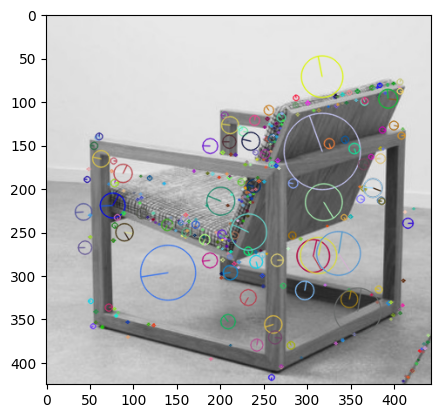

In [27]:
# Xác định và vẽ các keypoint
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sift.png')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray, None) # Keypoint: (x,y), size of the meaningful neighbourhood, angle which specifies its orientation,
                             # response that specifies strength of keypoints etc.

img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

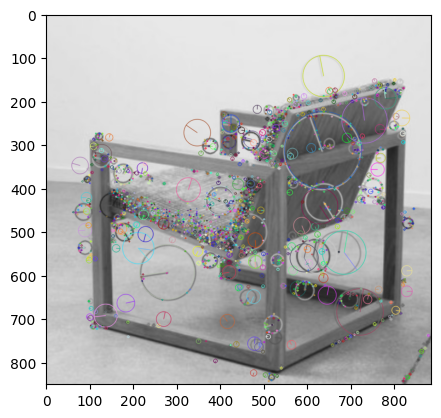

In [28]:
# Thực hiện phép resize (thay đổi kích thước)
scaled = cv2.resize(img, None, fx= 2, fy= 2, interpolation= cv2.INTER_LINEAR)
gray_sc = cv2.cvtColor(scaled, cv2.COLOR_BGR2GRAY)

sift_sc = cv2.SIFT_create()
kp_sc = sift_sc.detect(gray_sc, None) 

scaled = cv2.drawKeypoints(gray_sc, kp_sc, scaled, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB))

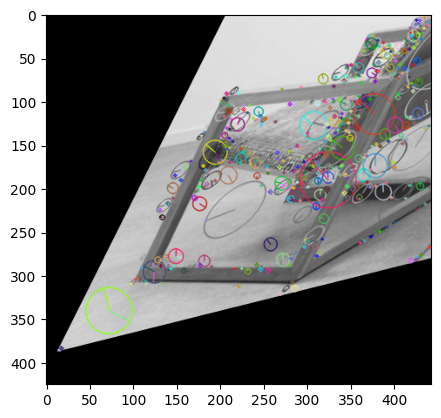

In [29]:
# Thực hiện phép biến đổi affine
rows, cols, chanels = img.shape

pts1 = np.float32([[50,350],[50,150],[250,150]])
pts2 = np.float32([[100,300],[200,100],[400,50]])

M = cv2.getAffineTransform(pts1,pts2)

affine = cv2.warpAffine(img, M, (cols,rows))
gray_aff = cv2.cvtColor(affine, cv2.COLOR_BGR2GRAY)

sift_aff = cv2.SIFT_create()
kp_aff = sift_aff.detect(gray_aff, None) 

affine = cv2.drawKeypoints(gray_aff, kp_aff, affine, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(affine, cv2.COLOR_BGR2RGB))

In [11]:
# Tính toán các descriptor
kp, des = sift.compute(gray, kp)
print(des[0])

[  1.   2.  18.  63. 124.   0.   0.   0. 134.   3.   1.  23.  87.   0.
   0.  13. 129.  10.   3.   0.   0.   0.   0.   6.   1.   3.   5.   0.
   0.   0.   0.   0.  11.  13. 122. 134.  33.   8.   1.   1. 134.  37.
  25.  46.  15.   0.   0.   4. 129.  26.  16.   0.   0.   0.   0.   1.
   0.   5.  20.   0.   0.   0.   0.   0.  18.   4.  16.  30.  28. 134.
  81.  16. 134.  13.   5.   3.   2.  23.  26.  84.  84.  16.  17.   2.
   0.   3.  18.  19.   0.   0.  16.   2.   0.   3.   7.   0.   4.   2.
  10.  22.  76. 108.  43.   6. 134.   0.   0.   3.  31.  28.  17. 107.
  36.   0.   0.   0.   0.  12.  81.  53.   0.   0.   0.   0.   0.   9.
  37.   0.]


<h4>Ví dụ đối sánh các đặc trưng giữa hai ảnh</h4>

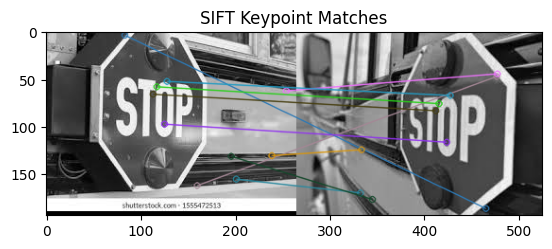

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hai ảnh đầu vào
img1 = cv2.imread('stop_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('stop_2.jpg', cv2.IMREAD_GRAYSCALE)

# Khởi tạo đối tượng SIFT
sift = cv2.SIFT_create()

# Phát hiện và mô tả các điểm đặc trưng
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Khởi tạo bộ đối sánh BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Thực hiện đối sánh các mô tả điểm đặc trưng
matches = bf.match(descriptors1, descriptors2)

# Sắp xếp các đối sánh theo khoảng cách
matches = sorted(matches, key=lambda x: x.distance)

# Vẽ các đối sánh
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Hiển thị ảnh với các đối sánh
plt.imshow(img_matches)
plt.title('SIFT Keypoint Matches')
plt.show()


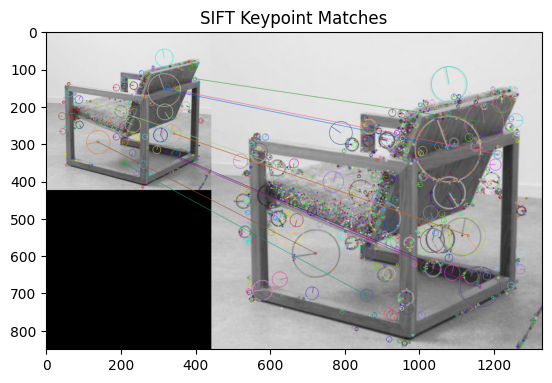

In [30]:
# Đối sánh giữa ảnh gốc và ảnh resize
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hai ảnh đầu vào
img1 = img.copy()
img2 = scaled.copy()

# Khởi tạo đối tượng SIFT
sift = cv2.SIFT_create()

# Phát hiện và mô tả các điểm đặc trưng
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Khởi tạo bộ đối sánh BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Thực hiện đối sánh các mô tả điểm đặc trưng
matches = bf.match(descriptors1, descriptors2)

# Sắp xếp các đối sánh theo khoảng cách
matches = sorted(matches, key=lambda x: x.distance)

# Vẽ các đối sánh
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Hiển thị ảnh với các đối sánh
plt.imshow(img_matches)
plt.title('SIFT Keypoint Matches')
plt.show()


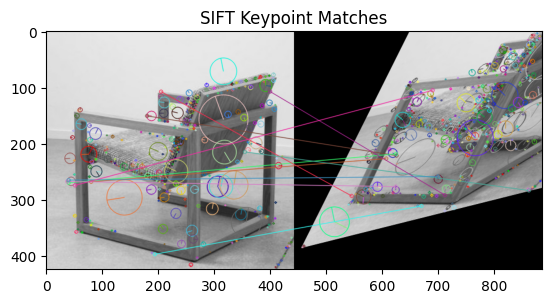

In [31]:
# Đối sánh giữa ảnh gốc và ảnh affine
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hai ảnh đầu vào
img1 = img.copy()
img2 = affine.copy()

# Khởi tạo đối tượng SIFT
sift = cv2.SIFT_create()

# Phát hiện và mô tả các điểm đặc trưng
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Khởi tạo bộ đối sánh BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Thực hiện đối sánh các mô tả điểm đặc trưng
matches = bf.match(descriptors1, descriptors2)

# Sắp xếp các đối sánh theo khoảng cách
matches = sorted(matches, key=lambda x: x.distance)

# Vẽ các đối sánh
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Hiển thị ảnh với các đối sánh
plt.imshow(img_matches)
plt.title('SIFT Keypoint Matches')
plt.show()
